# **Estadística Aplicada** #
## Andrea Carolina López Ruiz ##
**23 febrero - Sesión 8**

In [1]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#base de datos de usa. la importamos
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [3]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


## Exponencial

In [4]:
from  lifelines import ExponentialFitter

In [16]:
ex1 = ExponentialFitter().fit(rossi['week'], rossi['arrest'])

<AxesSubplot:>

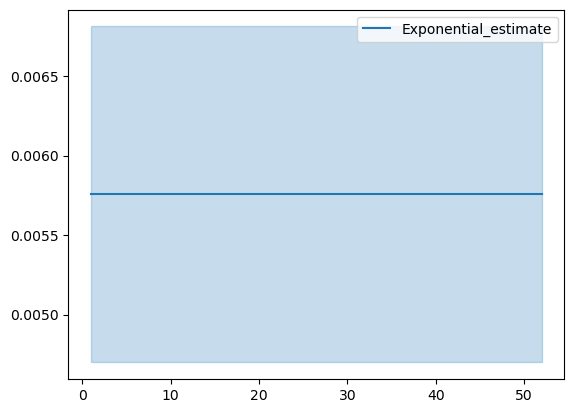

In [17]:
ex1.plot_hazard()

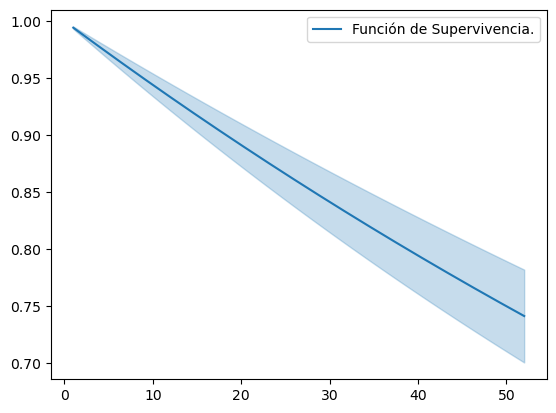

In [24]:
## graficamos la funcion de supervivencia
ex1.plot_survival_function(label = "Función de Supervivencia.");

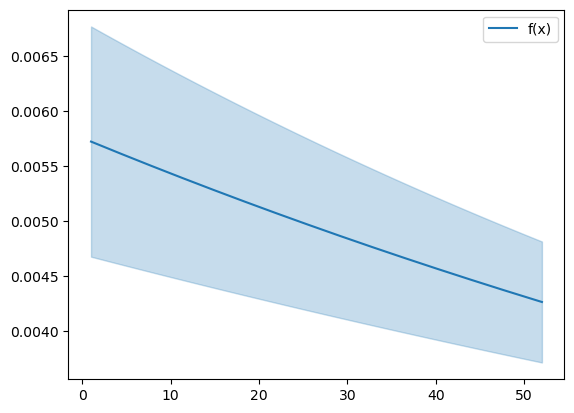

In [27]:
# graficamos la función de probabilidad f(t)
ex1.plot_density(label = "f(x)");

In [30]:
# calculamos la mediana
ex1.median_survival_time_

120.44346091357195

## Weibull

In [11]:
from lifelines import WeibullFitter

In [12]:
weib1= WeibullFitter().fit(rossi['week'], rossi['arrest'])

<AxesSubplot:>

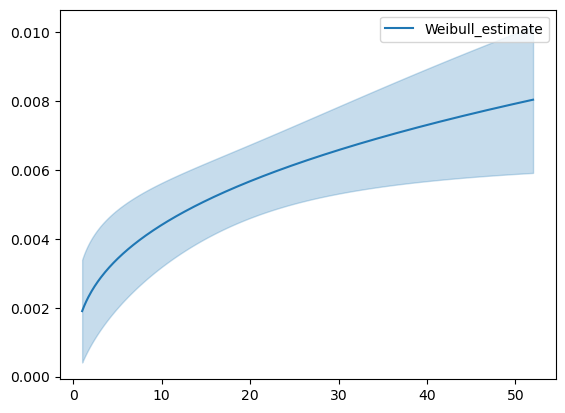

In [13]:
weib1.plot_hazard()

In [18]:
weib1.hazard_

,Weibull_estimate
1.000000,0.001901
1.118329,0.001980
1.236659,0.002054
1.354988,0.002124
1.473318,0.002190
...,...
51.526682,0.008018
51.645012,0.008024
51.763341,0.008031
51.881671,0.008038


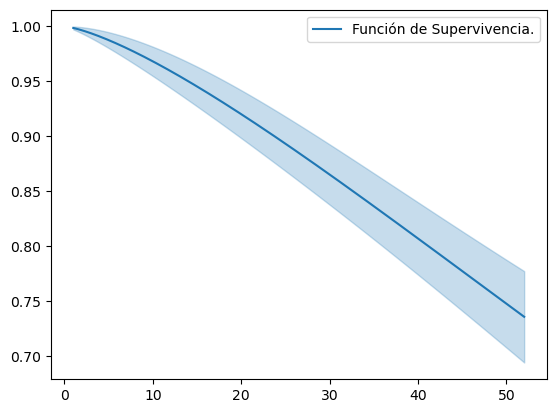

In [25]:
# graficamos la funcion de supervivencia
weib1.plot_survival_function(label = "Función de Supervivencia.");

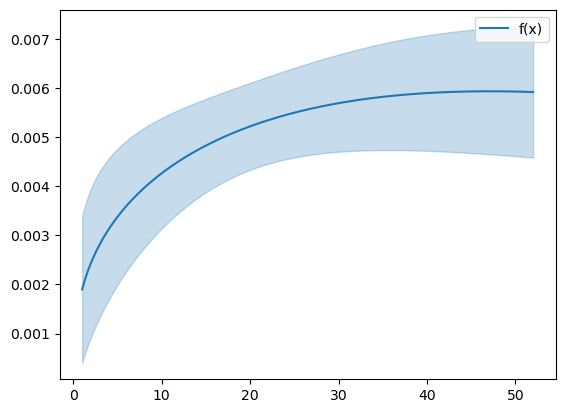

In [28]:
# graficamos la función de probabilidad f(t)
weib1.plot_density(label = "f(x)");

In [31]:
# calculamos la mediana
weib1.median_survival_time_

94.5561872278691

In [19]:
## riesgo de que te arresten en esa semana la que está en paréntesis 
weib1.hazard_at_times(4.0)

4.0    0.003153
Name: Weibull_estimate, dtype: float64

## Logaritmo Normal

In [20]:
from lifelines import LogNormalFitter

In [21]:
logn1 = LogNormalFitter().fit(rossi['week'], rossi ['arrest'])

<AxesSubplot:>

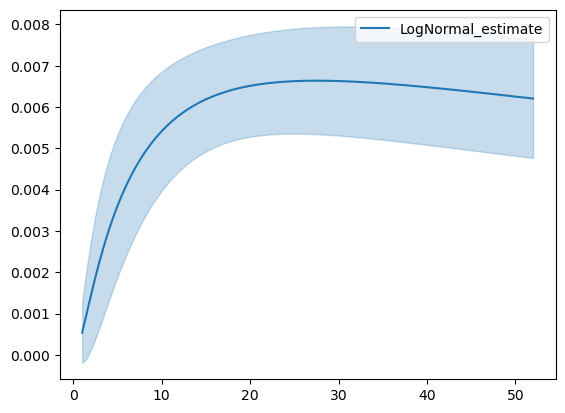

In [22]:
logn1.plot_hazard()

In [23]:
logn1.hazard_

,LogNormal_estimate
1.000000,0.000538
1.118329,0.000642
1.236659,0.000749
1.354988,0.000857
1.473318,0.000965
...,...
51.526682,0.006216
51.645012,0.006214
51.763341,0.006211
51.881671,0.006208


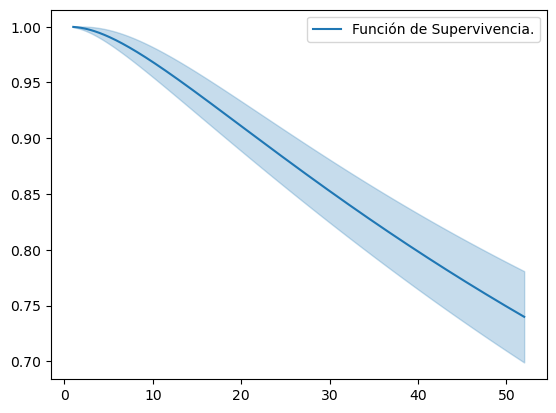

In [26]:
# graficamos la funcion de supervivencia
logn1.plot_survival_function(label = "Función de Supervivencia.");

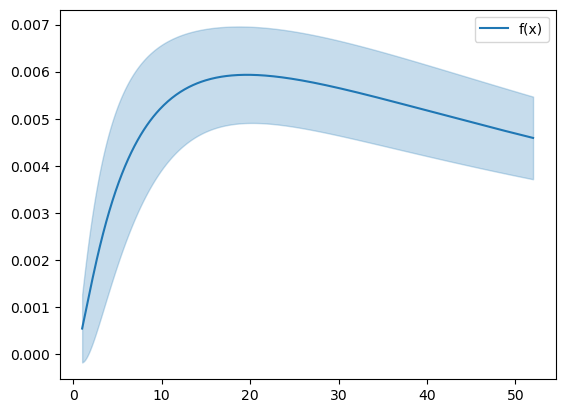

In [29]:
# graficamos la función de probabilidad f(t)
logn1.plot_density(label = "f(x)");

In [32]:
# calculamos la mediana
logn1.median_survival_time_

124.59531642094825

Para comparar y elegir el "mejor" modelo se suele usar el Criterio de Akaike (AIC)

El criterio de Akaike (AIC) se calcula :
$AIC = -2LogL +2k $
, donde k es el numero es el numero de parametros a estimar.
 
Se considera que el modelo con el menor valor en el AIC es el mejor modelo.

In [33]:
ex1.AIC_.round(), weib1.AIC_.round(), logn1.AIC_.round()

(1406.0, 1397.0, 1400.0)

El modelo coon el menor criterio de Akaike (1397.0) es el Weibull por lo tanto podemos concluir que el tiempo se supervivencia (liberado-arrestado) sigue un distribuccion de Weibull.
La mediana es de 94, lo cual significa que el 50% de los individuos ya había sido arrestado en la semana 94.